In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from templates import *
from templates_latent import *

In [3]:
device = 'cuda:0'
conf = viewsyn_autoenc()
conf.T_eval = 100
conf.latent_T_eval = 100

model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
print(model.load_state_dict(state['state_dict'], strict=False))
model.ema_model.eval()
model.ema_model.to(device)

Global seed set to 0


Model params: 266.11 M
<All keys matched successfully>


BeatGANsAutoencModelViewSyn(
  (time_embed): TimeStyleSeperateEmbed(
    (time_embed): Sequential(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): SiLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
    )
    (style): Identity()
  )
  (input_blocks): ModuleList(
    (0): TimestepEmbedSequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): TimestepEmbedSequential(
      (0): ResBlock(
        (in_layers): Sequential(
          (0): GroupNorm32(32, 128, eps=1e-05, affine=True)
          (1): SiLU()
          (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (h_upd): Identity()
        (x_upd): Identity()
        (emb_layers): Sequential(
          (0): SiLU()
          (1): Linear(in_features=512, out_features=256, bias=True)
        )
        (cond_emb_layers): Sequential(
          (0): SiLU()
          (1): Linear(in_features=512, out_features=128, bia

In [4]:
# gpus = [0]
# conf.eval_progrcams = ['infer']
# train(conf, gpus=gpus, mode='eval')

In [5]:
dataset = conf.make_dataset()
print('dataset : ', len(dataset) )

/home/jiyouseo/diffae/datasets/custom/train/
dataset :  100


In [6]:
dataloader = conf.make_loader(dataset, shuffle=False, drop_last=True)
iteration = iter(dataloader)
batch = next(iteration)
batch_2 = next(iteration)

In [7]:
target_img, camera = batch['img'].to(device), batch['camera'].to(device)
target_img_2, camera_2 = batch_2['img'].to(device), batch_2['camera'].to(device)

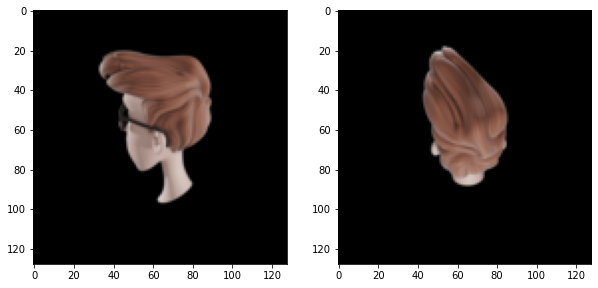

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ori = (target_img + 1)/ 2
ori2 = (target_img_2 + 1)/ 2

ax[0].imshow(ori[2].permute(1, 2, 0).cpu())
ax[1].imshow(ori2[2].permute(1, 2, 0).cpu())

In [13]:
camera_cond = model.encode(camera)
camera_cond_2 = model.encode(camera_2)
xT = model.encode_stochastic(target_img, camera_cond_2, T=250)
# xT = torch.randn(16, 3, 128, 128, device=device)
# xT = model.encode_stochastic(xT, camera_cond, T=250)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


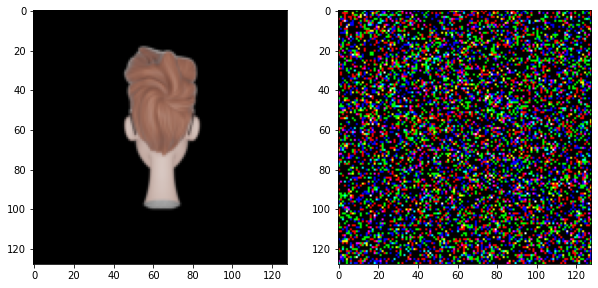

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ori = (target_img + 1)/ 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

In [15]:
import matplotlib.pyplot as plt
img = model.render(noise=xT, cond=camera_cond_2, T=100)

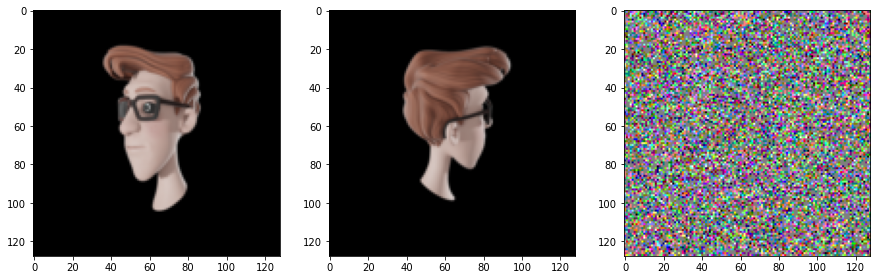

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ori = (target_img + 1)/ 2
ori2 = (target_img_2 + 1)/ 2
indx = 5
ax[0].imshow(ori[indx].permute(1, 2, 0).cpu())
ax[1].imshow(ori2[indx].permute(1, 2, 0).cpu())
ax[2].imshow(img[indx].permute(1, 2, 0).cpu())